In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HRV_Analysis.csv')

In [3]:
y_data = df['Stress']
x_data = df.drop(columns=['set','count','NN50','Actividad','Stress'])

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1,stratify=y_data)

print("numero de casos de test:", x_test.shape[0])
print("numero de casos de entrenamiento:",x_train.shape[0])

numero de casos de test: 29
numero de casos de entrenamiento: 113


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [6]:
svc = SVC(C=1, degree=1, gamma=1, kernel='poly')
svc.fit(x_train,y_train)

SVC(C=1, degree=1, gamma=1, kernel='poly')

In [7]:
preds_train = svc.predict(x_train)
preds_test = svc.predict(x_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9203539823008849
accuracy in test: 0.9310344827586207


In [8]:
print('Classification report of our model\n')
print(classification_report(preds_test, y_test))

Classification report of our model

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.83      0.91        12

    accuracy                           0.93        29
   macro avg       0.95      0.92      0.93        29
weighted avg       0.94      0.93      0.93        29



In [9]:
print(confusion_matrix(y_test, preds_test))

[[17  2]
 [ 0 10]]


In [24]:
svc2 = SVC(C=10, degree=1, gamma=0.1, kernel='poly')
svc2.fit(x_train, y_train)

SVC(C=10, degree=1, gamma=0.1, kernel='poly')

In [25]:
preds_train = svc2.predict(x_train)
preds_test = svc2.predict(x_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9203539823008849
accuracy in test: 0.9655172413793104


In [26]:
print('Classification report of our model\n')
print(classification_report(preds_test, y_test))

Classification report of our model

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.91      0.95        11

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.97        29



In [27]:
print(confusion_matrix(y_test, preds_test))

[[18  1]
 [ 0 10]]


In [14]:
svc3 = SVC(C=0.1, gamma=1, kernel='linear')
svc3.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [15]:
preds_train = svc3.predict(x_train)
preds_test = svc3.predict(x_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9203539823008849
accuracy in test: 0.9310344827586207


In [16]:
print('Classification report of our model\n')
print(classification_report(preds_test, y_test))

Classification report of our model

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.83      0.91        12

    accuracy                           0.93        29
   macro avg       0.95      0.92      0.93        29
weighted avg       0.94      0.93      0.93        29



In [17]:
print(confusion_matrix(y_test, preds_test))

[[17  2]
 [ 0 10]]


In [18]:
# prueba = pd.read_csv('prueba.csv')
# prueba = prueba.drop(columns=['set','count','NN50','Actividad','Stress'])

In [19]:
# prueba['prediccion'] = svc.predict(prueba)
# prueba

In [20]:
# prueba = prueba.drop(columns=['prediccion'])
# prueba['prediccion'] = svc2.predict(prueba)
# prueba

In [21]:
# prueba = prueba.drop(columns=['prediccion'])
# prueba['prediccion'] = svc3.predict(prueba)
# prueba

In [22]:
# pd.Series(abs(svc3.coef_[0]), index=x_train.columns).nlargest(14).plot(kind='barh')

In [23]:
# x_data = x_data.drop(columns=['LF','VLF','HF','Max RR (ms)','Min RR (ms)', 'Mean RR (ms)', 'Mean HR (bpm)', 'SDHR'])

<AxesSubplot:>

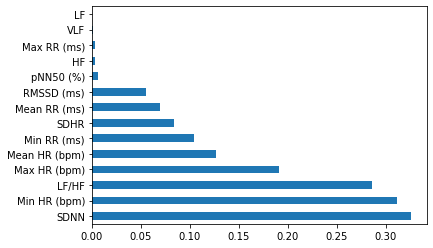

In [29]:
pd.Series(abs(svc3.coef_[0]), index=x_train.columns).nlargest(14).plot(kind='barh')